In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

In [6]:
from Orange.data.filter import SameValue
from Orange.data import Table
data = Table('podatki/athletes.tab')
print(data)

[[17, Male, 1.72, 68, 0, 0, 0, 0, Freestyle Skiing, United States] {1996-04-12, Aaron Blunck},
 [27, Male, 1.85, 85, 0, 0, 0, 0, Snowboard, Italy] {1986-05-14, Aaron March},
 [21, Male, 1.78, 68, 0, 0, 0, 0, Short Track, Kazakhstan] {1992-06-30, Abzal Azhgaliyev},
 [21, Male, 1.86, 82, 0, 0, 0, 0, Alpine Skiing, New Zealand] {1992-07-30, Adam Barwood},
 [21, Male, 1.75, 57, 0, 0, 0, 0, Nordic Combined, Poland] {1992-12-18, Adam Cieslar},
 [18, Male, 1.70, 76, 0, 0, 0, 0, Alpine Skiing, Morocco] {1995-04-22, Adam Lamhamedi},
 [23, Male, 1.78, 80, 0, 0, 0, 0, Alpine Skiing, Slovakia] {1990-09-13, Adam Zampa},
 [21, Female, 1.62, 56, 0, 0, 0, 0, Alpine Skiing, France] {1992-09-28, Adeline Baud},
 [21, Male, 1.86, 75, 0, 0, 0, 0, Snowboard, Austria] {1992-11-22, Adrian Krainer},
 [21, Male, 1.78, 73, 0, 0, 0, 0, Cross-Country, France] {1992-08-07, Adrien Backscheider},
 [29, Male, 1.82, 80, 0, 0, 0, 0, Alpine Skiing, France] {1984-09-18, Adrien Theaux},
 [19, Female, 1.73, 65, 0, 0, 0, 0, 

In [3]:
data.domain

[age, gender, height, weight, gold_medals, silver_medals, bronze_medals, total_medals, sport, country] {birthdate, name}

In [7]:
for column in data.domain.variables:
    print(column, type(column))

age ContinuousVariable
gender DiscreteVariable
height ContinuousVariable
weight ContinuousVariable
gold_medals ContinuousVariable
silver_medals ContinuousVariable
bronze_medals ContinuousVariable
total_medals ContinuousVariable
sport DiscreteVariable
country DiscreteVariable


In [5]:
data.domain['sport'].values

['Alpine Skiing',
 'Biathlon',
 'Bobsleigh',
 'Cross-Country',
 'Curling',
 'Freestyle Skiing',
 'Ice Hockey',
 'Luge',
 'Nordic Combined',
 'Short Track',
 'Skeleton',
 'Ski Jumping',
 'Snowboard',
 'Speed Skating']

In [18]:
print(data[0, 8])

Freestyle Skiing


In [19]:
# ustvarimo filter, SameValue(spremenljivka, vrednost)
filt = SameValue(data.domain['sport'], 'Alpine Skiing')

# izberi vse alpske smučarje
data_subset = filt(data)
data_subset

[[21, Male, 1.86, 82, 0, ...] {1992-07-30, Adam Barwood},
 [18, Male, 1.70, 76, 0, ...] {1995-04-22, Adam Lamhamedi},
 [23, Male, 1.78, 80, 0, ...] {1990-09-13, Adam Zampa},
 [21, Female, 1.62, 56, 0, ...] {1992-09-28, Adeline Baud},
 [29, Male, 1.82, 80, 0, ...] {1984-09-18, Adrien Theaux},
 ...
]

Text(0, 0.5, 'teža (kg)')

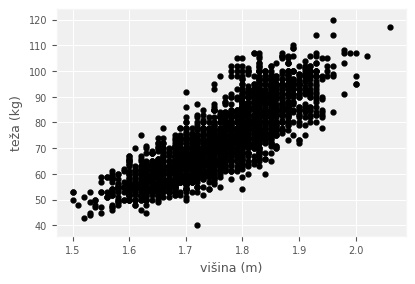

In [25]:
plt.figure()
x = data.X[:, 2]
y = data.X[:, 3]
plt.plot(x, y, "k.")
plt.xlabel('višina (m)')
plt.ylabel('teža (kg)')

In [26]:
print(data.X)

[[17.    1.    1.72 ...  0.    5.   79.  ]
 [27.    1.    1.85 ...  0.   12.   36.  ]
 [21.    1.    1.78 ...  0.    9.   39.  ]
 ...
 [28.    0.    1.68 ...  0.   12.   28.  ]
 [22.    1.    1.76 ...  1.    5.   16.  ]
 [19.    0.    1.58 ...  0.    9.   30.  ]]


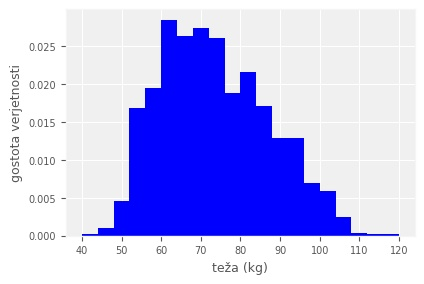

In [29]:
weights = data.X[:, 3]

plt.figure()
plt.hist(weights, density=True, bins=20, color="blue")
plt.xlabel('teža (kg)')
plt.ylabel('gostota verjetnosti');